In [394]:
import numpy as np 
import pandas as pd
import tensorflow.keras as keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [395]:
# loading data
data = pd.read_csv("../input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [396]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [397]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Let's plot the correlation heat map

Text(0.5, 1.0, 'Correlation matrix of features')

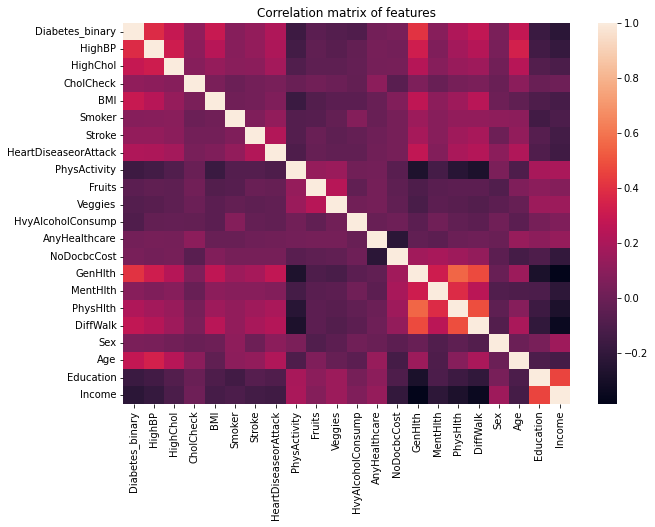

In [398]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(corr)
plt.title("Correlation matrix of features")

In [399]:
corr

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


## It shows negative value on "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "Education" and "Income".

In [400]:
corr["Diabetes_binary"]

Diabetes_binary         1.000000
HighBP                  0.381516
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
AnyHealthcare           0.023191
NoDocbcCost             0.040977
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Sex                     0.044413
Age                     0.278738
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64

In [401]:
th=0.2

corr_th = corr["Diabetes_binary"][corr["Diabetes_binary"] > th]
corr_th

Diabetes_binary         1.000000
HighBP                  0.381516
HighChol                0.289213
BMI                     0.293373
HeartDiseaseorAttack    0.211523
GenHlth                 0.407612
PhysHlth                0.213081
DiffWalk                0.272646
Age                     0.278738
Name: Diabetes_binary, dtype: float64

In [402]:
# drop features that under the threshold
data = data.drop(corr["Diabetes_binary"][corr["Diabetes_binary"] <= th].keys(), axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0
1,0.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0


In [403]:
data["BMI"] *= 1
data["BMIBand"] = pd.cut(data["BMI"], 5)

bmi = data[["BMIBand", "Diabetes_binary"]].groupby(["BMIBand"], as_index=False).mean().sort_values(by="BMIBand", ascending=True)

for i in range(5):
        left = bmi["BMIBand"][i].left
        right = bmi["BMIBand"][i].right
        
        if i == 0:
            data.loc[ data["BMI"] <= right, "BMI"] = i
        
        else:
            data.loc[(data["BMI"] > left) & (data["BMI"] <= right), "BMI"] = i
            
data = data.drop("BMIBand", axis=1)

bmi

,BMIBand,Diabetes_binary
0,"(11.914, 29.2]",0.376809
1,"(29.2, 46.4]",0.646187
2,"(46.4, 63.6]",0.798023
3,"(63.6, 80.8]",0.621212
4,"(80.8, 98.0]",0.585714


In [404]:
data.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,0.0,0.0,0.0,3.0,30.0,0.0,4.0
1,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,12.0
2,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,13.0
3,0.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,11.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0


In [405]:
data["PhysHlth"] *= 1
data["PhysHlthBand"] = pd.cut(data["PhysHlth"], 5)

bmi = data[["PhysHlthBand", "Diabetes_binary"]].groupby(["PhysHlthBand"], as_index=False).mean().sort_values(by="PhysHlthBand", ascending=True)

for i in range(5):
        left = bmi["PhysHlthBand"][i].left
        right = bmi["PhysHlthBand"][i].right
        
        if i == 0:
            data.loc[ data["PhysHlth"] <= right, "PhysHlth"] = i
        
        else:
            data.loc[(data["PhysHlth"] > left) & (data["PhysHlth"] <= right), "PhysHlth"] = i
          
data = data.drop("PhysHlthBand", axis=1)

bmi

,PhysHlthBand,Diabetes_binary
0,"(-0.03, 6.0]",0.441502
1,"(6.0, 12.0]",0.613095
2,"(12.0, 18.0]",0.653686
3,"(18.0, 24.0]",0.690019
4,"(24.0, 30.0]",0.718792


In [406]:
data.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age
0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,4.0
1,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,12.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13.0
3,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,11.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0


In [407]:
data[["HighBP", "Diabetes_binary"]].groupby(["HighBP"], as_index=False).mean().sort_values(by="HighBP", ascending=True)

,HighBP,Diabetes_binary
0,0.0,0.283279
1,1.0,0.667905


In [408]:
data[["HighChol", "Diabetes_binary"]].groupby(["HighChol"], as_index=False).mean().sort_values(by="HighChol", ascending=True)

,HighChol,Diabetes_binary
0,0.0,0.347759
1,1.0,0.637354


In [409]:
data[["GenHlth", "Diabetes_binary"]].groupby(["GenHlth"], as_index=False).mean().sort_values(by="GenHlth", ascending=True)

,GenHlth,Diabetes_binary
0,1.0,0.137648
1,2.0,0.321105
2,3.0,0.574423
3,4.0,0.735924
4,5.0,0.788223


In [410]:
data["GenHlth+PhysHlth"] = data["GenHlth"] + data["PhysHlth"]
data = data.drop(["GenHlth", "PhysHlth"], axis=1)
data.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,DiffWalk,Age,GenHlth+PhysHlth
0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0
1,0.0,1.0,1.0,0.0,0.0,0.0,12.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,13.0,2.0
3,0.0,1.0,1.0,0.0,0.0,0.0,11.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0


In [411]:
data[["GenHlth+PhysHlth", "Diabetes_binary"]].groupby(["GenHlth+PhysHlth"], as_index=False).mean().sort_values(by="GenHlth+PhysHlth", ascending=True)

,GenHlth+PhysHlth,Diabetes_binary
0,1.0,0.128939
1,2.0,0.315490
2,3.0,0.561638
3,4.0,0.704366
4,5.0,0.698541
5,6.0,0.667526
6,7.0,0.674302
7,8.0,0.745879
8,9.0,0.775489


In [412]:
data[["Age", "Diabetes_binary"]].groupby(["Age"], as_index=False).mean().sort_values(by="Age", ascending=True)

,Age,Diabetes_binary
0,1.0,0.079673
1,2.0,0.100287
2,3.0,0.153245
3,4.0,0.224132
4,5.0,0.298580
5,6.0,0.374785
6,7.0,0.449360
7,8.0,0.495525
8,9.0,0.566950
9,10.0,0.604090


In [413]:
data["HighBP+HighChol"] = data["HighBP"] + data["HighChol"]
data = data.drop(["HighBP", "HighChol"], axis=1)
data.head()

,Diabetes_binary,BMI,HeartDiseaseorAttack,DiffWalk,Age,GenHlth+PhysHlth,HighBP+HighChol
0,0.0,0.0,0.0,0.0,4.0,7.0,1.0
1,0.0,0.0,0.0,0.0,12.0,3.0,2.0
2,0.0,0.0,0.0,0.0,13.0,2.0,0.0
3,0.0,0.0,0.0,0.0,11.0,3.0,2.0
4,0.0,0.0,0.0,0.0,8.0,2.0,0.0


In [414]:
data[["HighBP+HighChol", "Diabetes_binary"]].groupby(["HighBP+HighChol"], as_index=False).mean().sort_values(by="HighBP+HighChol", ascending=True)

,HighBP+HighChol,Diabetes_binary
0,0.0,0.211567
1,1.0,0.493655
2,2.0,0.725539


In [415]:
# # preprocessing
# x = data.drop("Diabetes_binary", axis=1)
# x["Age"] /= np.max(x["Age"])
# x["BMI"] /= np.max(x["BMI"])
# x["Education"] /= np.max(x["Education"])
# x["GenHlth"] /= np.max(x["GenHlth"])
# x["Income"] /= np.max(x["Income"])
# x["MentHlth"] /= np.max(x["MentHlth"])
# x["PhysHlth"] /= np.max(x["PhysHlth"])

# y = data["Diabetes_binary"]
# y = to_categorical(y)

# print(f"Shape: {x.shape}, {y.shape}")

In [416]:
# preprocessing
x = data.drop("Diabetes_binary", axis=1)
# x["Age"] /= x["Age"].max()
y = data["Diabetes_binary"]

print(f"Shape: {x.shape}, {y.shape}")
x.head()

Shape: (70692, 6), (70692,)


,BMI,HeartDiseaseorAttack,DiffWalk,Age,GenHlth+PhysHlth,HighBP+HighChol
0,0.0,0.0,0.0,4.0,7.0,1.0
1,0.0,0.0,0.0,12.0,3.0,2.0
2,0.0,0.0,0.0,13.0,2.0,0.0
3,0.0,0.0,0.0,11.0,3.0,2.0
4,0.0,0.0,0.0,8.0,2.0,0.0


In [417]:
# building set of train_val and test 
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2)

print(f"Train_val Counts: {x_train_val.shape[0]}\nTest Counts: {x_test.shape[0]}")

Train_val Counts: 56553
Test Counts: 14139


In [418]:
# building model
class Keras_Model(keras.Model):
    def __init__(self):
        super(Keras_Model, self).__init__()

        self.act = keras.layers.Activation("relu")
        self.dropout = keras.layers.Dropout(0.25)

        self.block_1 = keras.Sequential()
        for i in range(1):
            self.block_1.add(keras.layers.Dense(128))
            self.block_1.add(self.act)
#             self.block_1.add(self.dropout)

        self.block_2 = keras.Sequential()
        for i in range(1):
            self.block_2.add(keras.layers.Dense(64))
            self.block_2.add(self.act)
#             self.block_2.add(self.dropout)

        self.block_3 = keras.Sequential()
        for i in range(1):
            self.block_3.add(keras.layers.Dense(32))
            self.block_3.add(self.act)
            self.block_3.add(self.dropout)

        self.fc_out = keras.layers.Dense(1, activation="sigmoid")

    def call(self, inputs, training=None, mask=None):
        x = self.block_1(inputs)

        x = self.block_2(x)

        x = self.block_3(x)

        x = self.fc_out(x)
        return x

    def get_config(self):
        config = super(Keras_Model, self).get_config()
        config.update()
        return config

In [419]:
# callbacks
def lr_scheduler(base_lr, epochs):
    def scheduler(epoch, lr):
        p = epoch / epochs

        if p > 0.9:
            lr_n = base_lr * 1e-3

        elif p > 0.75:
            lr_n = base_lr * 1e-2

        elif p >= 0.5:
            lr_n = base_lr * 1e-1

        else:
            lr_n = lr

        print(f"[INFO] {epoch + 1}/{epochs} LR From ", lr, " to ", lr_n)

        return lr_n

    return LearningRateScheduler(scheduler)

In [420]:
learning_rate = 5e-3
epochs = 50

opt = keras.optimizers.SGD(
    learning_rate=learning_rate,
    momentum=0.9,
    decay=1e-4,
)
model = Keras_Model()
model.compile(
    optimizer=opt,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["mae", "acc"]
)

In [421]:
history = model.fit(
        x=x_train_val, y=y_train_val,
        validation_data=(x_test, y_test),
        epochs=epochs,
        callbacks=[lr_scheduler(base_lr=learning_rate, epochs=epochs)],
        verbose=0,
    )

[INFO] 1/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 2/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 3/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 4/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 5/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 6/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 7/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 8/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 9/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 10/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 11/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 12/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 13/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 14/50 LR From  0.004999999888241291  to  0.004999999888241291
[INFO] 15/50 LR From  0.004999999888241291 

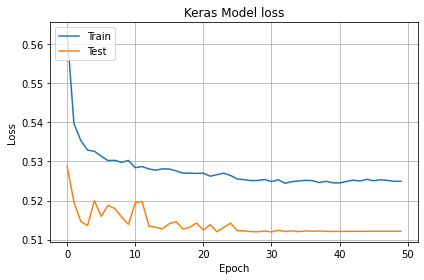

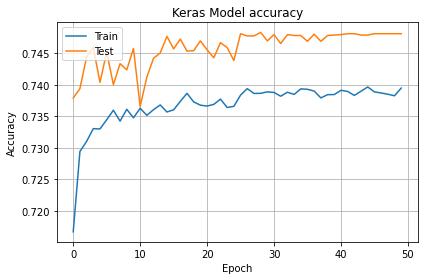

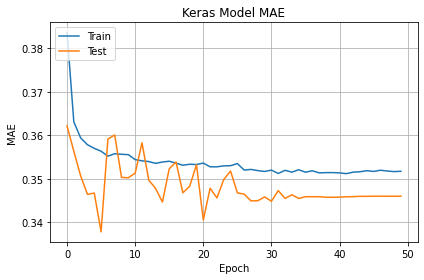

In [422]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Keras Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Keras Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Keras Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [423]:
log = model.evaluate(x_test,y_test)

print(f"\nTest Loss: {log[0]}\nTest Accuracy: {log[2]}\nTest MAE: {log[1]}")

442/442 [==============================] - 1s 2ms/step - loss: 0.5121 - mae: 0.3460 - acc: 0.7481

Test Loss: 0.5121336579322815
Test Accuracy: 0.7480726838111877
Test MAE: 0.3459886610507965


In [424]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(x_test)

np.array(y_pred[:20]), np.array(y_test[:20])

(array([[0.04174972],
        [0.58694994],
        [0.8156893 ],
        [0.5916567 ],
        [0.16054699],
        [0.7403486 ],
        [0.6964863 ],
        [0.06806844],
        [0.02064842],
        [0.5135938 ],
        [0.682792  ],
        [0.91994   ],
        [0.6854899 ],
        [0.7568293 ],
        [0.5918055 ],
        [0.17689446],
        [0.41719335],
        [0.49899688],
        [0.8474292 ],
        [0.70029855]], dtype=float32),
 array([0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1.]))

In [425]:
rf = RandomForestClassifier(100, max_features='sqrt', n_jobs=1, random_state=1)
%time rf.fit(x_train_val, y_train_val)

CPU times: user 2.34 s, sys: 0 ns, total: 2.34 s
Wall time: 2.34 s


RandomForestClassifier(max_features='sqrt', n_jobs=1, random_state=1)

In [426]:
%time rf.score(x_test, y_test)

CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 246 ms


0.7414244288846453

In [427]:
y_pred_rf = rf.predict(x_test)
y_pred_rf[:20]

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1.])

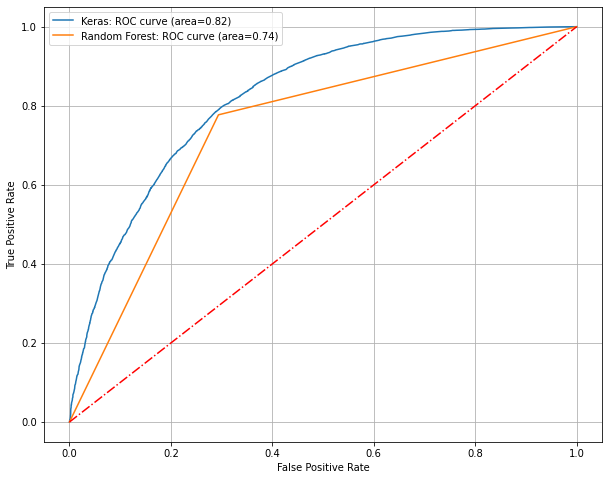

In [428]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)

auc = metrics.roc_auc_score(y_test, y_pred)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Keras: ROC curve (area=%.2f)"%auc)
plt.plot(fpr_rf, tpr_rf, label="Random Forest: ROC curve (area=%.2f)"%auc_rf)
plt.plot((0,1), (0,1), 'r-.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()

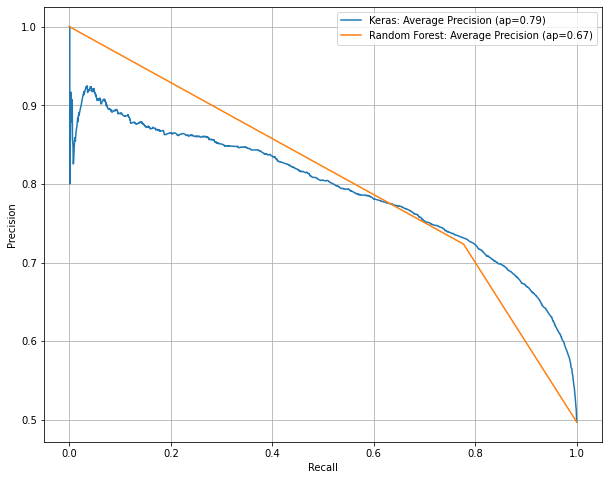

In [429]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
precision_rf, recall_rf, thresholds = metrics.precision_recall_curve(y_test, y_pred_rf)


ap = metrics.average_precision_score(y_test, y_pred)
ap_rf = metrics.average_precision_score(y_test, y_pred_rf)


plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label="Keras: Average Precision (ap=%.2f)" % (ap))
plt.plot(recall_rf, precision_rf, label="Random Forest: Average Precision (ap=%.2f)" % (ap_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [430]:
# confusion matrix
th_o = 0.5

y_pred[y_pred > th_o] = 1
y_pred[y_pred <= th_o] = 0

y_pred[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [431]:
print("Keras")
print("="*50)
print(metrics.confusion_matrix(y_test, y_pred))
print("\nRandom Forest")
print("="*50)
print(metrics.confusion_matrix(y_test, y_pred_rf))

Keras
[[5009 2102]
 [1460 5568]]

Random Forest
[[5022 2089]
 [1567 5461]]


In [432]:
print("Keras")
print("="*50)
print(metrics.classification_report(y_test, y_pred))

Keras
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7111
         1.0       0.73      0.79      0.76      7028

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [433]:
print("Random Forest")
print("="*50)
print(metrics.classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      7111
         1.0       0.72      0.78      0.75      7028

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

